In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import scipy.cluster.hierarchy as sch
import cmath




In [2]:
def showCluster_simple(X,labels):
    unique_labels = set(labels)
    if len(unique_labels)<7:
        colors = ['or', 'ob', 'og', 'ok', 'oc', 'om', 'oy']  
         
        for k in unique_labels:

            class_member_mask = (labels == k)
            xy = X[class_member_mask]
            plt.plot(xy[:, 0], xy[:, 1], colors[k], markersize=10)
           
    else:
        colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    
        for k, col in zip(unique_labels, colors):

            class_member_mask = (labels == k)
            xy = X[class_member_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor=tuple(col), markersize=10)

    plt.show()

In [3]:
def showCluster(dataSet, k, centroids, clusterAssment):  
    numSamples, dim = dataSet.shape  
    if dim != 2:
        return 1   
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']  
    if k > len(mark):
        return 1  
  
    for i in range(numSamples):  
        markIndex = int(clusterAssment[i])  
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])  
  
    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']  
    # draw the centroids  
    for i in range(k):  
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 12)  
  
    plt.show()

In [4]:
def showCluster_dbscan(X,labels):
    # Black removed and is used for noise instead.
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.show()

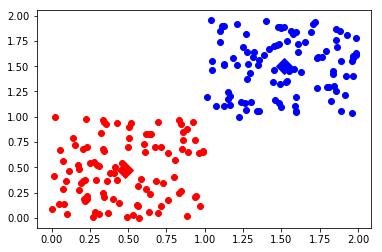

In [16]:

trainnum=100
    
data = np.random.rand(trainnum, 2)
data2 = 1+np.random.rand(trainnum, 2)

data3=np.row_stack((data,data2))
data=data3
estimator = KMeans(n_clusters=2)
estimator.fit(data)
label_pred = estimator.labels_ 
centroids = estimator.cluster_centers_ 
inertia = estimator.inertia_ 
showCluster(data,2,centroids,label_pred)

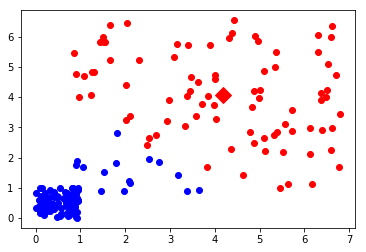

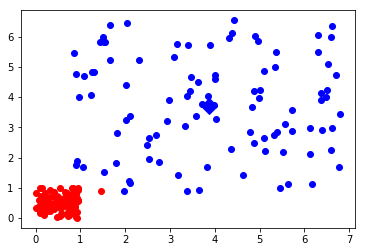

In [5]:
trainnum=100
    
data = np.random.rand(trainnum, 2)
data2 = 0.8+6*np.random.rand(trainnum, 2)

data3=np.row_stack((data,data2))
data=data3
estimator = KMeans(n_clusters=2)
estimator.fit(data)
label_pred = estimator.labels_ 
centroids = estimator.cluster_centers_ 
inertia = estimator.inertia_ 
showCluster(data,2,centroids,label_pred)

gmm = GaussianMixture(n_components=2).fit(data)
showCluster(data,2, gmm.means_,gmm.predict(data))


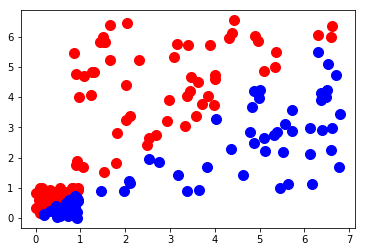

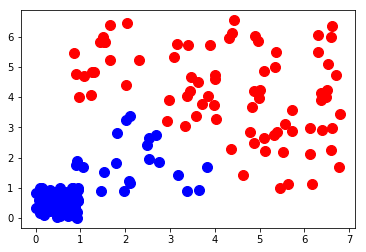

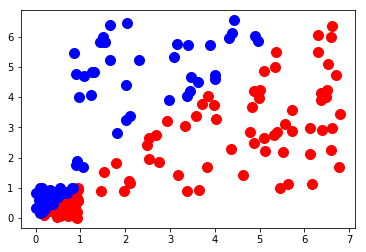

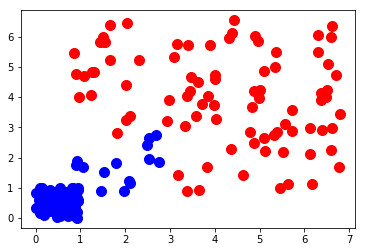

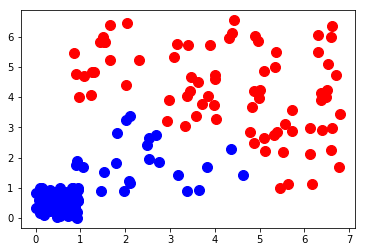

In [8]:

model = AgglomerativeClustering(n_clusters=2, linkage="average", affinity="cosine")
model.fit(data)
showCluster_simple(data,model.labels_)

model = AgglomerativeClustering(n_clusters=2, linkage="average", affinity="euclidean")
model.fit(data)
showCluster_simple(data,model.labels_)


model = AgglomerativeClustering(n_clusters=2, linkage="complete", affinity="cosine")
model.fit(data)
showCluster_simple(data,model.labels_)

model = AgglomerativeClustering(n_clusters=2, linkage="complete", affinity="euclidean")
model.fit(data)
showCluster_simple(data,model.labels_)



model = AgglomerativeClustering(n_clusters=2, linkage="ward", affinity="euclidean")
model.fit(data)
showCluster_simple(data,model.labels_)

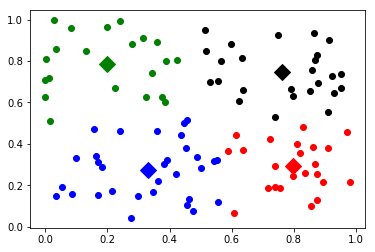

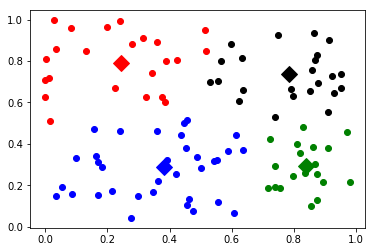

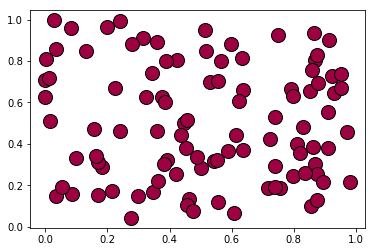

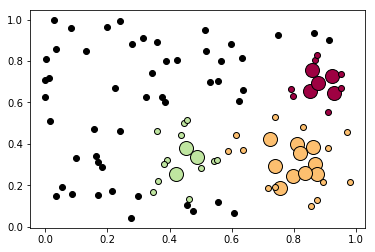

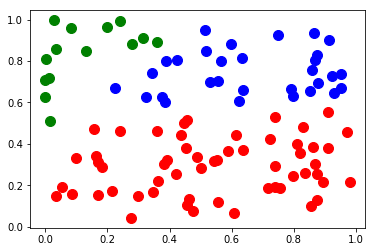

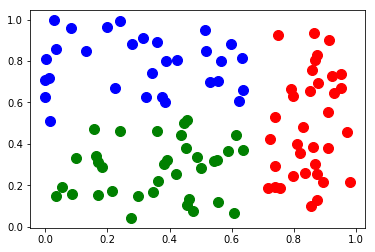

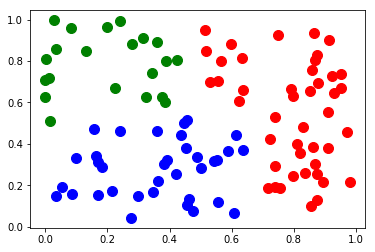

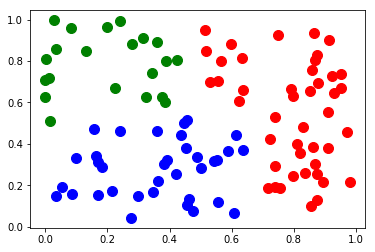

In [10]:


trainnum=100
    
data = np.random.rand(trainnum, 2)
estimator = KMeans(n_clusters=4)
estimator.fit(data)
label_pred = estimator.labels_ 
centroids = estimator.cluster_centers_ 
inertia = estimator.inertia_ 
showCluster(data,4,centroids,label_pred)

gmm = GaussianMixture(n_components=4).fit(data)
showCluster(data,4, gmm.means_,gmm.predict(data))


db = DBSCAN(eps=0.3, min_samples=10).fit(data)
showCluster_dbscan(data,db.labels_)

db = DBSCAN(eps=0.15, min_samples=10).fit(data)
showCluster_dbscan(data,db.labels_)


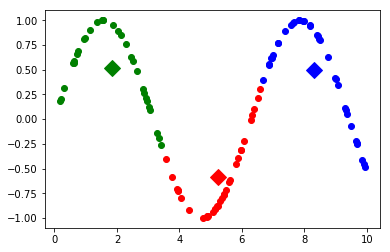

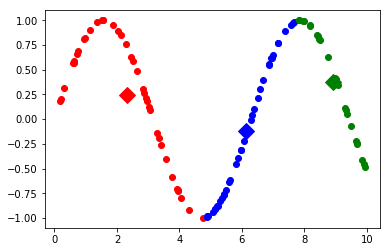

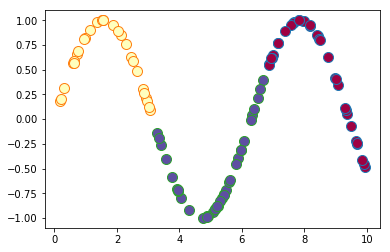

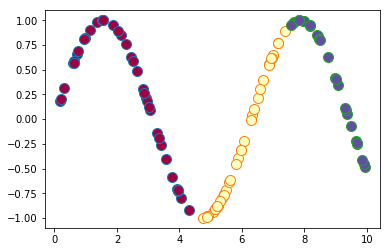

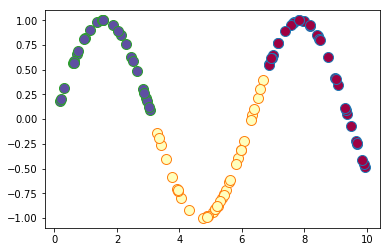

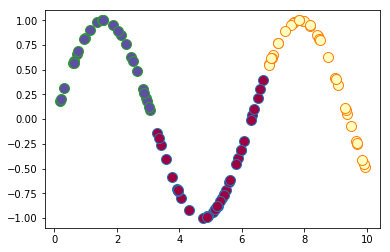

In [87]:

data = 10*np.random.rand(trainnum, 2)
for i in range(trainnum):
    data[i,1]=(cmath.sin(data[i,0]).real)
estimator = KMeans(n_clusters=3)
estimator.fit(data)
label_pred = estimator.labels_ 
centroids = estimator.cluster_centers_ 
inertia = estimator.inertia_ 
showCluster(data,3,centroids,label_pred)


gmm = GaussianMixture(n_components=3).fit(data)
showCluster(data,3, gmm.means_,gmm.predict(data))


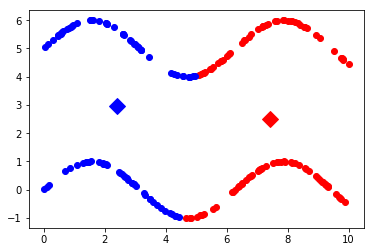

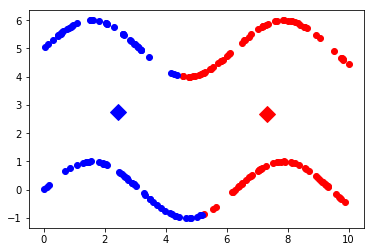

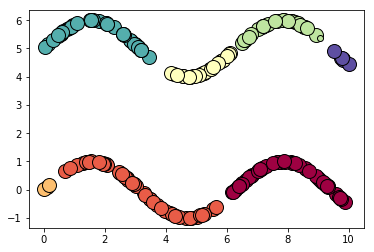

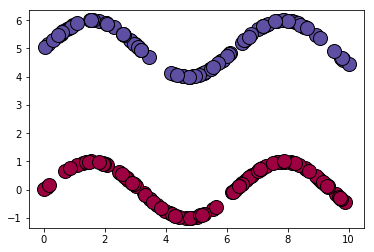

In [26]:
data = 10*np.random.rand(trainnum, 2)
for i in range(trainnum):
    data[i,1]=(cmath.sin(data[i,0]).real)

    
data2 = 10*np.random.rand(trainnum, 2)
for i in range(trainnum):
    data2[i,1]=5+(cmath.sin(data2[i,0]).real)
    
data3=np.row_stack((data,data2))
data=data3
estimator = KMeans(n_clusters=2)
estimator.fit(data)
label_pred = estimator.labels_ 
centroids = estimator.cluster_centers_ 
inertia = estimator.inertia_ 
showCluster(data,2,centroids,label_pred)


gmm = GaussianMixture(n_components=2).fit(data)
showCluster(data,2, gmm.means_,gmm.predict(data))

db = DBSCAN(eps=0.5, min_samples=3).fit(data)
showCluster_dbscan(data,db.labels_)

db = DBSCAN(eps=1, min_samples=3).fit(data)
showCluster_dbscan(data,db.labels_)



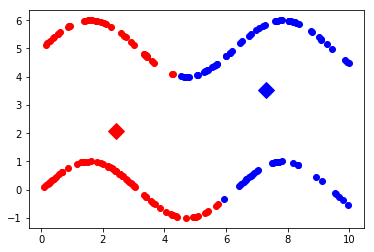

In [19]:
estimator = KMeans(n_clusters=2)
estimator.fit(data)
label_pred = estimator.labels_ 
centroids = estimator.cluster_centers_ 
inertia = estimator.inertia_ 
showCluster(data,2,centroids,label_pred)

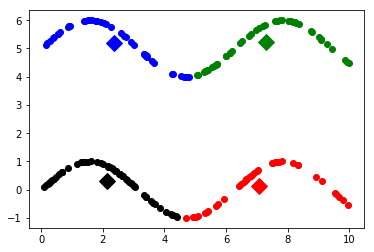

In [20]:
estimator = KMeans(n_clusters=4)
estimator.fit(data)
label_pred = estimator.labels_ 
centroids = estimator.cluster_centers_ 
inertia = estimator.inertia_ 
showCluster(data,4,centroids,label_pred)

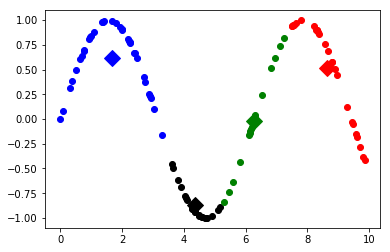

In [45]:
gmm = GaussianMixture(n_components=4).fit(data)
showCluster(data,4, gmm.means_,gmm.predict(data))

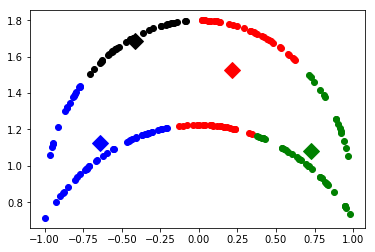

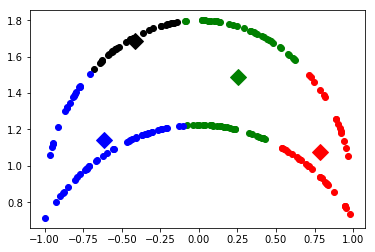

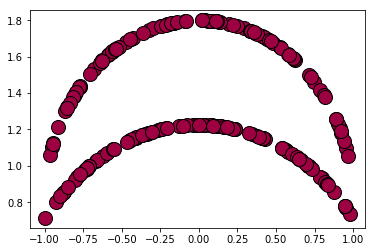

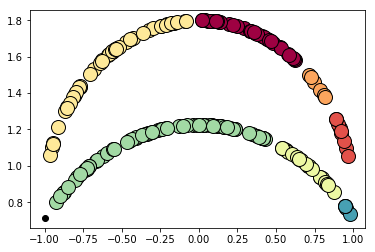

In [160]:
trainnum=100
data =1- 2*np.random.rand(trainnum, 2)
for i in range(trainnum):
    data[i,1]=0.8+(cmath.sqrt(1-data[i,0]*data[i,0]).real)

data2 = 1- 2*np.random.rand(trainnum, 2)
for i in range(trainnum):
    data2[i,1]=(cmath.sqrt(1.5-data2[i,0]*data2[i,0]).real)

    
data3=np.row_stack((data,data2))
data=data3
estimator = KMeans(n_clusters=4)
estimator.fit(data)
label_pred = estimator.labels_ 
centroids = estimator.cluster_centers_ 
inertia = estimator.inertia_ 
showCluster(data,4,centroids,label_pred)

gmm = GaussianMixture(n_components=4).fit(data)
showCluster(data,4, gmm.means_,gmm.predict(data))

db = DBSCAN(eps=0.5, min_samples=3).fit(data)
showCluster_dbscan(data,db.labels_)

db = DBSCAN(eps=0.1, min_samples=3).fit(data)
showCluster_dbscan(data,db.labels_)


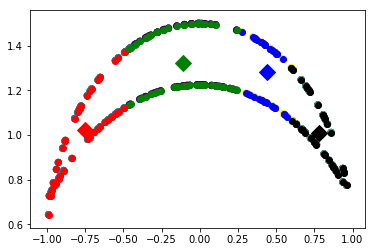